In [1]:
pip install nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import LatentDirichletAllocation



In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
df=pd.read_csv('/content/iphone.csv')
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [5]:
df.describe()

,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.info

<bound method DataFrame.info of      productAsin country        date  isVerified  ratingScore  \
0     B09G9BL5CP   India  11-08-2024        True            4   
1     B09G9BL5CP   India  16-08-2024        True            5   
2     B09G9BL5CP   India  14-05-2024        True            4   
3     B09G9BL5CP   India  24-06-2024        True            5   
4     B09G9BL5CP   India  18-05-2024        True            5   
...          ...     ...         ...         ...          ...   
3057  B09G9D8KRQ   India  11-10-2023        True            1   
3058  B09G9D8KRQ   India  14-10-2022        True            2   
3059  B09G9D8KRQ   India  24-02-2022        True            3   
3060  B09G9D8KRQ   India  16-10-2023        True            1   
3061  B09G9D8KRQ   India  11-11-2023        True            1   

                              reviewTitle  \
0                              No charger   
1                         iPhone 13 256GB   
2                 Flip camera option nill   
3                                 Product   
4                            Good product   
...                                   ...   
3057  Very bad experience with i phone 13   
3058    not happy with this apple product   
3059                           Good phone   
3060                    Battery discharge   
3061    Batter power needs to be improved   

                                      reviewDescription  \
0     Every thing is good about iPhones, there's not...   
1     It look so fabulous, I am android user switche...   
2     I tried to flip camera while recording but no ...   
3                                          100% genuine   
4            Happy to get the iPhone 13 in Amazon offer   
...                                                 ...   
3057  Useless phon never buy this heat n useless cam...   
3058  iam not happy with this product why because ch...   
3059                                         Good phone   
3060  While charging mobile it's getting so hot even...   
3061  Battery power is be very bad need to chat on d...   

                                              reviewUrl  \
0     https://www.amazon.in/gp/customer-reviews/R345...   
1     https://www.amazon.in/gp/customer-reviews/R2HJ...   
2     https://www.amazon.in/gp/customer-reviews/R3Y7...   
3     https://www.amazon.in/gp/customer-reviews/R1P9...   
4     https://www.amazon.in/gp/customer-reviews/R1XI...   
...                                                 ...   
3057  https://www.amazon.in/gp/customer-reviews/R10O...   
3058  https://www.amazon.in/gp/customer-reviews/R2FW...   
3059  https://www.amazon.in/gp/customer-reviews/R2C7...   
3060  https://www.amazon.in/gp/customer-reviews/R3K0...   
3061  https://www.amazon.in/gp/customer-reviews/R2QO...   

                                 reviewedIn  \
0       Reviewed in India on 11 August 2024   
1       Reviewed in India on 16 August 2024   
2          Reviewed in India on 14 May 2024   
3         Reviewed in India on 24 June 2024   
4          Reviewed in India on 18 May 2024   
...                                     ...   
3057   Reviewed in India on 11 October 2023   
3058   Reviewed in India on 14 October 2022   
3059  Reviewed in India on 24 February 2022   
3060   Reviewed in India on 16 October 2023   
3061  Reviewed in India on 11 November 2023   

                                variant variantAsin  
0          Colour: MidnightSize: 256 GB  B09G9BQS98  
1          Colour: MidnightSize: 256 GB  B09G9BQS98  
2          Colour: MidnightSize: 256 GB  B09G9BQS98  
3          Colour: MidnightSize: 256 GB  B09G9BQS98  
4          Colour: MidnightSize: 256 GB  B09G9BQS98  
...                                 ...         ...  
3057  Colour: (PRODUCT) REDSize: 128 GB  B09G99CW2N  
3058  Colour: (PRODUCT) REDSize: 128 GB  B09G99CW2N  
3059  Colour: (PRODUCT) REDSize: 128 GB  B09G99CW2N  
3060  Colour: (PRODUCT) REDSize: 128 GB  B09G99CW2N  
3061  Colour: (PRODUCT) REDSize: 128 GB  B09G99CW2N  

[3062 rows x 1

In [7]:
df.head(30)

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
5,B09G9BL5CP,India,14-05-2024,True,5,Too smooth and effective battery life,5 star 👍,https://www.amazon.in/gp/customer-reviews/R3J3...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
6,B09G9BL5CP,India,28-01-2024,True,5,Apple 13 256 GB,"Great Product... Nothing to say, as the Name A...",https://www.amazon.in/gp/customer-reviews/R2ZM...,Reviewed in India on 28 January 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
7,B09G9BL5CP,India,01-03-2024,True,5,Good,Good product 😀💯,https://www.amazon.in/gp/customer-reviews/R1XF...,Reviewed in India on 1 March 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
8,B09G9BL5CP,India,14-11-2023,True,4,Good,Nice product,https://www.amazon.in/gp/customer-reviews/R2QA...,Reviewed in India on 14 November 2023,Colour: MidnightSize: 256 GB,B09G9BQS98
9,B09G9BL5CP,India,03-02-2024,True,5,Excellent,Excellent product,https://www.amazon.in/gp/customer-reviews/R322...,Reviewed in India on 3 February 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [8]:
df.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


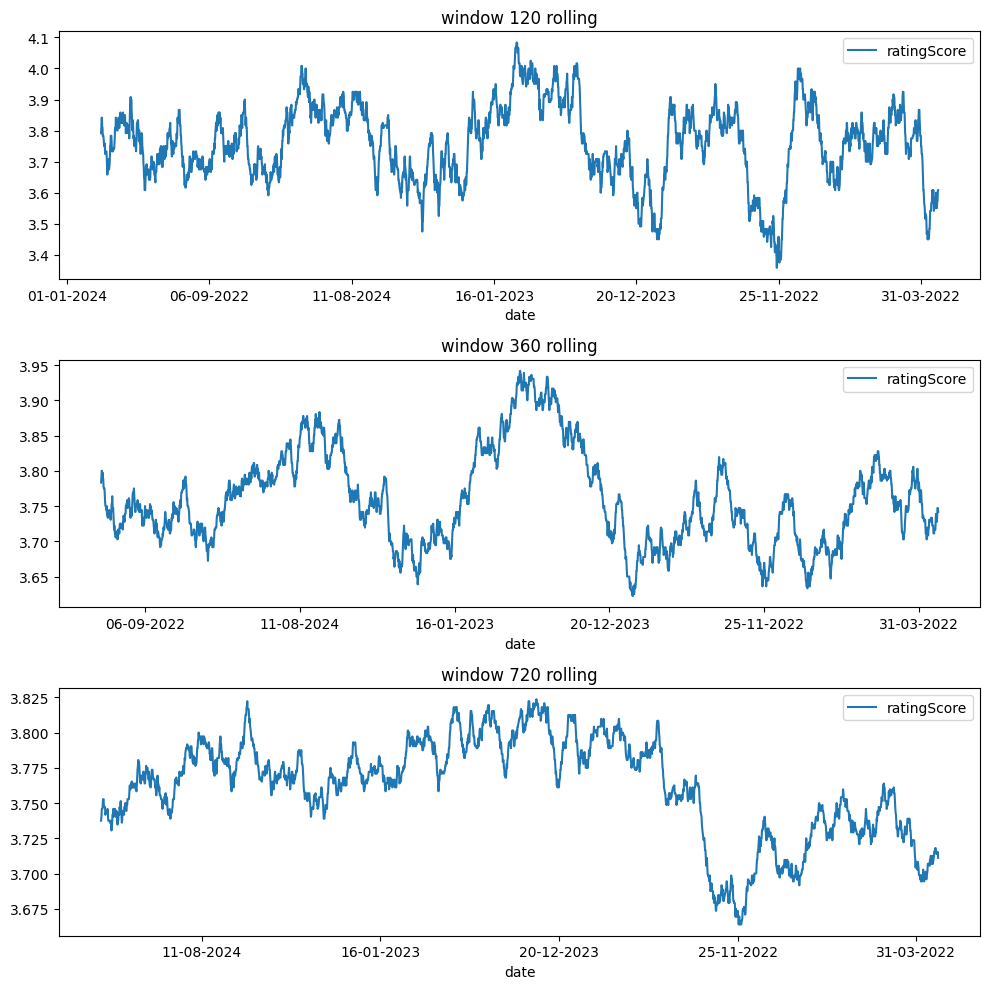

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
time_ratings = df[['date', 'ratingScore']].sort_values(by='date').set_index('date')
time_ratings.rolling(120).mean().plot(ax=ax[0], title='window 120 rolling')
ax[0].grid(axis='x', color='white', linestyle='--')
time_ratings.rolling(360).mean().plot(ax=ax[1], title='window 360 rolling')
ax[1].grid(axis='x', color='white', linestyle='--')
time_ratings.rolling(720).mean().plot(ax=ax[2], title='window 720 rolling')
ax[2].grid(axis='x', color='white', linestyle='--')
plt.tight_layout()
plt.show()


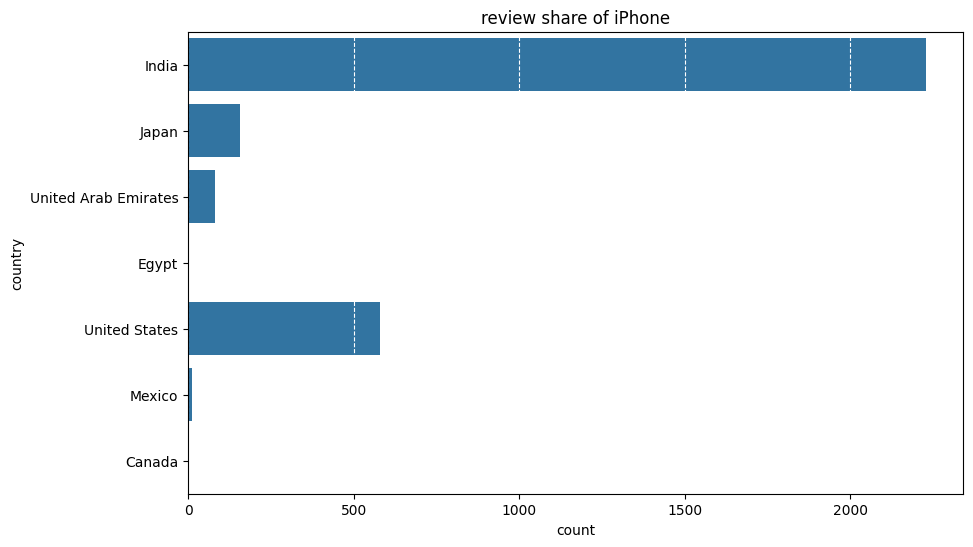

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='country', data=df)
plt.grid(axis='x',linestyle = "--", color ="white")
plt.title("review share of iPhone")
plt.show()

In [11]:
df['reviewDescription']=df['reviewDescription'].fillna('')
df['reviewUrl']=df['reviewUrl'].fillna('')

In [12]:
import re

def clean_text(row):
    title = row['reviewTitle']
    description = row['reviewDescription']

    # Combine title and description
    combined_text = title + ' ' + description

    # Convert to lowercase
    combined_text = combined_text.lower()

    # Remove punctuation
    combined_text = re.sub(r'[^\w\s]', '', combined_text)

    return combined_text

df['cleaned_text'] = df.apply(clean_text, axis=1)

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize

def combine_and_tokenize(row):
    title = row['reviewTitle']
    description = row['reviewDescription']

    # Combine title and description
    combined_text = title + ' ' + description

    # Tokenize into sentences
    sentences = sent_tokenize(combined_text)

    return sentences

df['combined_sentences'] = df.apply(combine_and_tokenize, axis=1)

In [14]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['text_without_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

# Create CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
count_matrix = count_vectorizer.fit_transform(df['lemmatized_text'])

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

document_term_matrix = hstack([count_matrix, tfidf_matrix])



In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['lemmatized_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_scores'].apply(lambda x: 'positive' if x>=0 else 'negative')

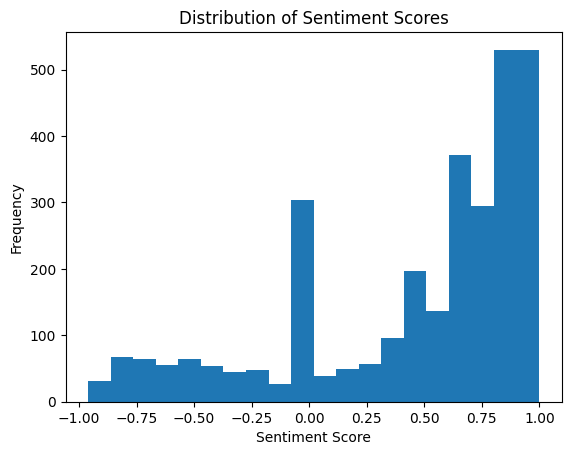

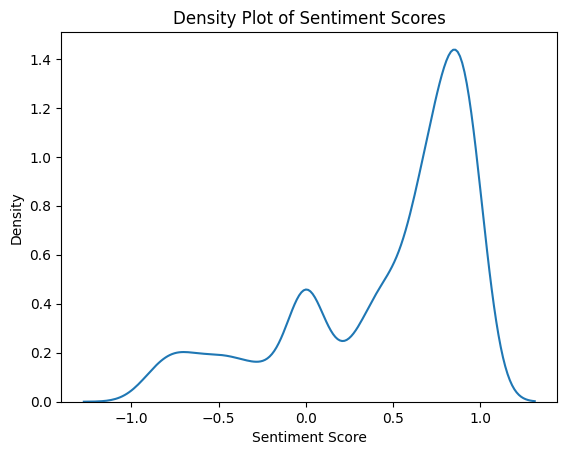

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(df['sentiment_scores'], bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Density Plot
sns.kdeplot(df['sentiment_scores'])
plt.title('Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

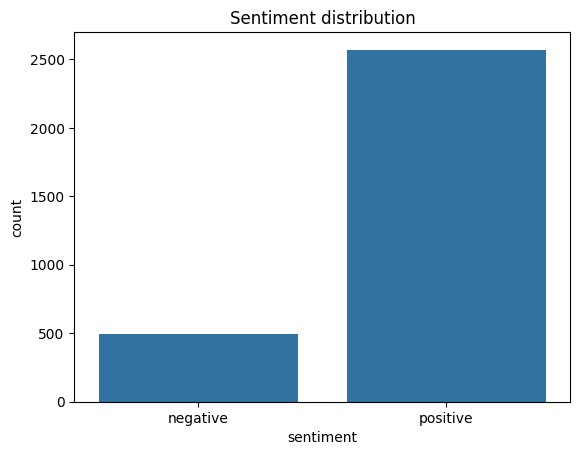

In [19]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment distribution')
plt.show()

In [20]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [21]:
from sklearn.model_selection import train_test_split

X = document_term_matrix
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression Accuracy: 0.933115823817292
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        85
           1       0.94      0.99      0.96       528

    accuracy                           0.93       613
   macro avg       0.91      0.79      0.84       613
weighted avg       0.93      0.93      0.93       613



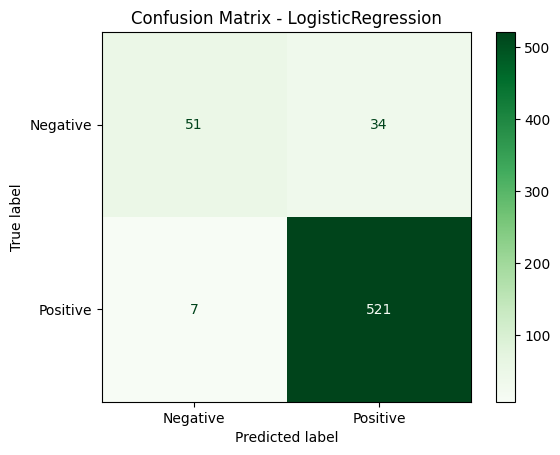



MultinomialNB Accuracy: 0.9184339314845025
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        85
           1       0.96      0.94      0.95       528

    accuracy                           0.92       613
   macro avg       0.82      0.86      0.84       613
weighted avg       0.93      0.92      0.92       613



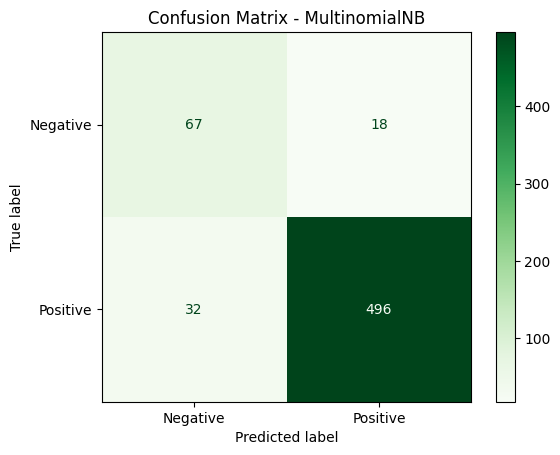



SVC Accuracy: 0.8955954323001631
              precision    recall  f1-score   support

           0       0.92      0.27      0.42        85
           1       0.89      1.00      0.94       528

    accuracy                           0.90       613
   macro avg       0.91      0.63      0.68       613
weighted avg       0.90      0.90      0.87       613



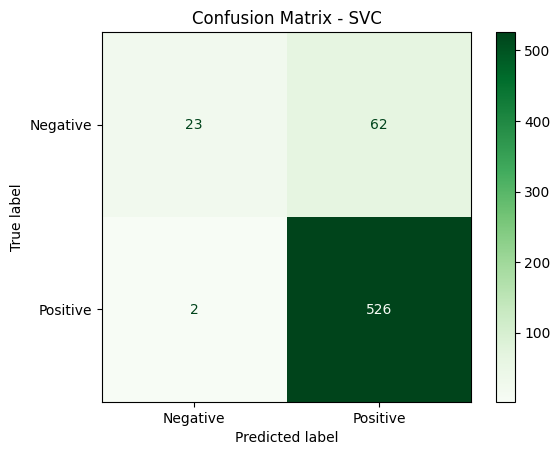



RandomForestClassifier Accuracy: 0.9200652528548124
              precision    recall  f1-score   support

           0       0.85      0.52      0.64        85
           1       0.93      0.98      0.96       528

    accuracy                           0.92       613
   macro avg       0.89      0.75      0.80       613
weighted avg       0.92      0.92      0.91       613



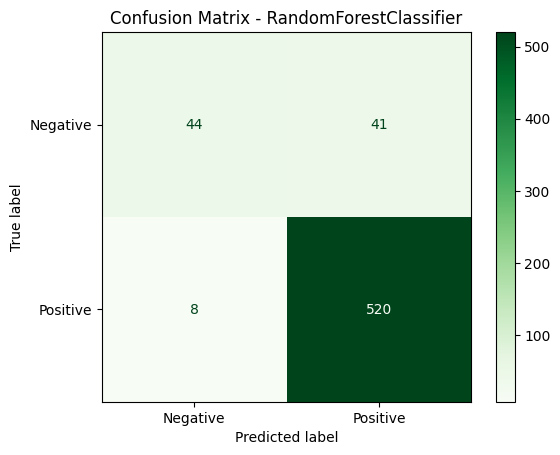



Best Model: LogisticRegression with Accuracy: 0.933115823817292


In [22]:
models = [
    LogisticRegression(),
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

best_accuracy = 0
best_model = None

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model.__class__.__name__} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive']) # Assuming 0 is Negative and 1 is Positive
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

    print("\n")  # Add a separator between models

    # Update best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy}")

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
import numpy as np

count_feature_names = count_vectorizer.get_feature_names_out()
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
all_feature_names = np.concatenate([count_feature_names, tfidf_feature_names])

if isinstance(best_model, LogisticRegression):
    importances = best_model.coef_[0]
    # Use all_feature_names instead of vectorizer.get_feature_names_out()
    feature_names = all_feature_names

    indices = abs(importances).argsort()[::-1]

    N = 10
    print(f"Top {N} Most Important Features (Logistic Regression):")
    for i in range(N):
        print(f"{i + 1}. {feature_names[indices[i]]}: {importances[indices[i]]}")

Top 10 Most Important Features (Logistic Regression):
1. bad: -2.6469361053792193
2. worst: -2.402899871190672
3. disappointed: -2.205877631829451
4. poor: -2.0946459008655363
5. disappointing: -1.789186645641502
6. stolen: -1.7469190594770059
7. best: 1.7303899439995165
8. great: 1.6362647984716185
9. nice: 1.5499725344319666
10. problem: -1.442138483630949


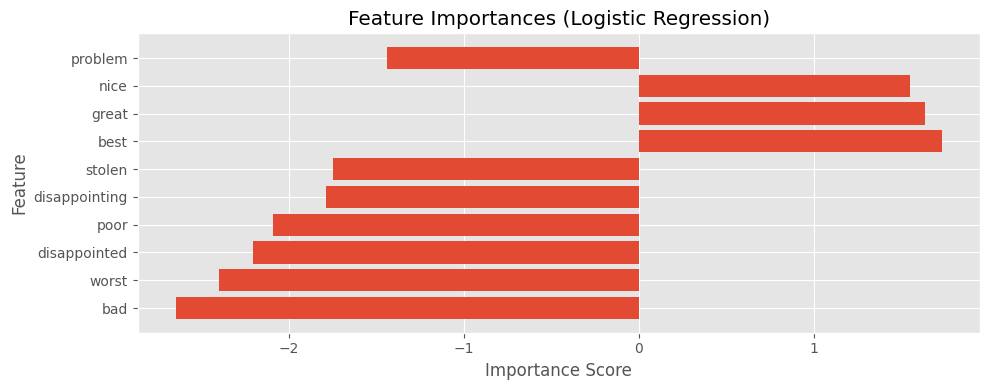

In [26]:
import matplotlib.pyplot as plt


N = 10

plt.figure(figsize=(10, 4))
plt.title("Feature Importances (Logistic Regression)")
plt.barh(range(N), importances[indices[:N]], align="center")
plt.yticks(range(N), [feature_names[i] for i in indices[:N]])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()